In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("E:/UCLA/Winter 2024/ECON 442B/hw1_w24_data.csv")
data["date"] = pd.to_datetime(data["date"])
data = data.set_index("date")
data

C:\Users\prano\AppData\Local\Temp\ipykernel_23788\2214693197.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["date"] = pd.to_datetime(data["date"])


,I_US,I_EU,ir_diff,USDEUR
date,,,,
2004-01-01,1.10,2.1463,-1.046,0.79428
2004-02-01,1.06,2.0895,-1.030,0.80205
2004-03-01,1.05,2.0706,-1.021,0.80038
2004-04-01,1.05,2.0288,-0.979,0.81215
2004-05-01,1.08,2.0488,-0.969,0.83452
...,...,...,...,...
2023-08-01,5.35,3.6718,1.678,0.90709
2023-09-01,5.44,3.7803,1.660,0.91470
2023-10-01,5.49,3.8800,1.610,0.94675


In [21]:
data1 = pd.DataFrame(data["ir_diff"].copy())

In [22]:
k=0.62
data1["Filter"] = data1["ir_diff"].ewm(alpha = k, adjust = False).mean()
data1["Filter Error"] = data1["ir_diff"] - data1["Filter"]
T = 2
data1["epsilon_bar"] = data1["Filter Error"].expanding(T).mean()
data1["mu_t"] = data1["Filter Error"].rolling(T).mean()
data1["stddev_t"] = data1["Filter Error"].rolling(T).std(ddof = 1)
data1["Test Statistic"] = data1["mu_t"]/(data1["stddev_t"]/np.sqrt(T))
data1

,ir_diff,Filter,Filter Error,epsilon_bar,mu_t,stddev_t,Test Statistic
date,,,,,,,
2004-01-01,-1.046,-1.046000,0.000000,NaN,NaN,NaN,NaN
2004-02-01,-1.030,-1.036080,0.006080,0.003040,0.003040,0.004299,1.000000
2004-03-01,-1.021,-1.026730,0.005730,0.003937,0.005905,0.000247,33.782609
2004-04-01,-0.979,-0.997138,0.018138,0.007487,0.011934,0.008773,1.923725
2004-05-01,-0.969,-0.979692,0.010692,0.008128,0.014415,0.005265,3.872227
...,...,...,...,...,...,...,...
2023-08-01,1.678,1.703429,-0.025429,0.007140,-0.043174,0.025095,-2.433044
2023-09-01,1.660,1.676503,-0.016503,0.007041,-0.020966,0.006312,-4.697699
2023-10-01,1.610,1.635271,-0.025271,0.006905,-0.020887,0.006200,-4.764375


[]

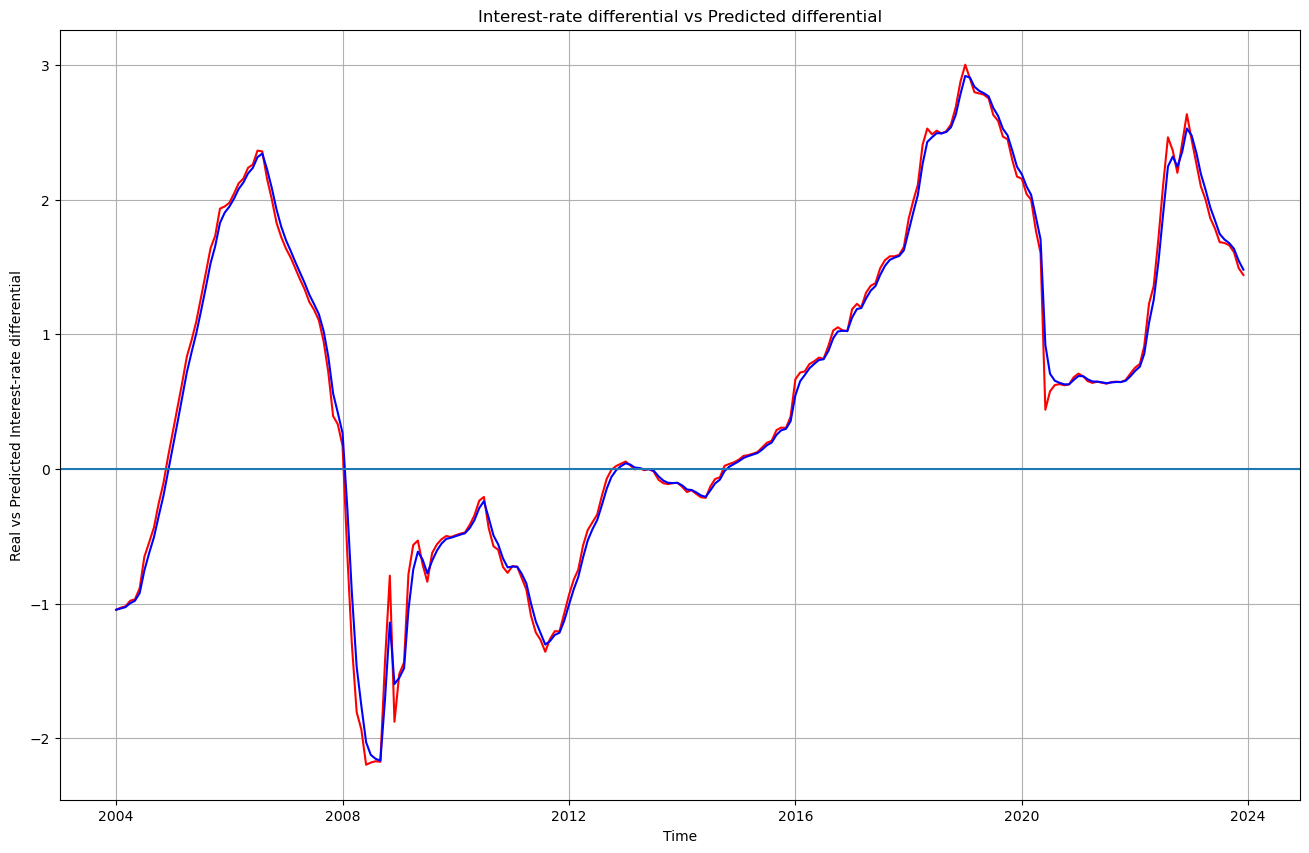

In [23]:
plt.figure(figsize = (16,10))
plt.plot(data.index,"ir_diff" ,data=data1, color = "red")
plt.plot(data.index, "Filter",data=data1, color="blue")
plt.axhline(y = 0)
plt.title("Interest-rate differential vs Predicted differential")
plt.xlabel("Time")
plt.ylabel("Real vs Predicted Interest-rate differential")
plt.grid()
plt.plot()

In [24]:
data1["signal"] = 0
z = 0.5
control = 0.01
for i in data1.index:
    if(data1.loc[i, "Test Statistic"] > -z) & (data1.loc[i, "epsilon_bar"] < control):
        data1.loc[i, "signal"] = 1
    elif(data1.loc[i, "Test Statistic"] < z) & (data1.loc[i, "epsilon_bar"] > control):
        data1.loc[i, "signal"] = -1

In [28]:
price_data = pd.merge_asof(data, data1, left_index = True, right_index = True, direction = "backward")
price_data["signal"] = price_data["signal"].replace(to_replace = 0, method = "ffill")
price_data

,I_US,I_EU,ir_diff_x,USDEUR,ir_diff_y,Filter,Filter Error,epsilon_bar,mu_t,stddev_t,Test Statistic,signal
date,,,,,,,,,,,,
2004-01-01,1.10,2.1463,-1.046,0.79428,-1.046,-1.046000,0.000000,NaN,NaN,NaN,NaN,0
2004-02-01,1.06,2.0895,-1.030,0.80205,-1.030,-1.036080,0.006080,0.003040,0.003040,0.004299,1.000000,1
2004-03-01,1.05,2.0706,-1.021,0.80038,-1.021,-1.026730,0.005730,0.003937,0.005905,0.000247,33.782609,1
2004-04-01,1.05,2.0288,-0.979,0.81215,-0.979,-0.997138,0.018138,0.007487,0.011934,0.008773,1.923725,1
2004-05-01,1.08,2.0488,-0.969,0.83452,-0.969,-0.979692,0.010692,0.008128,0.014415,0.005265,3.872227,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,5.35,3.6718,1.678,0.90709,1.678,1.703429,-0.025429,0.007140,-0.043174,0.025095,-2.433044,1
2023-09-01,5.44,3.7803,1.660,0.91470,1.660,1.676503,-0.016503,0.007041,-0.020966,0.006312,-4.697699,1
2023-10-01,5.49,3.8800,1.610,0.94675,1.610,1.635271,-0.025271,0.006905,-0.020887,0.006200,-4.764375,1


In [29]:
price_data["Returns"] = np.log(price_data["USDEUR"]).diff()
price_data["Strategy Returns"] = price_data["signal"].shift()*price_data["Returns"]
price_data["Log Strategy Returns"] = price_data["Strategy Returns"].cumsum()
price_data["Simple Strategy Returns"] = np.exp(price_data["Log Strategy Returns"])-1

In [30]:
price_data

,I_US,I_EU,ir_diff_x,USDEUR,ir_diff_y,Filter,Filter Error,epsilon_bar,mu_t,stddev_t,Test Statistic,signal,Returns,Strategy Returns,Log Strategy Returns,Simple Strategy Returns
date,,,,,,,,,,,,,,,,
2004-01-01,1.10,2.1463,-1.046,0.79428,-1.046,-1.046000,0.000000,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2004-02-01,1.06,2.0895,-1.030,0.80205,-1.030,-1.036080,0.006080,0.003040,0.003040,0.004299,1.000000,1,0.009735,0.000000,0.000000,0.000000
2004-03-01,1.05,2.0706,-1.021,0.80038,-1.021,-1.026730,0.005730,0.003937,0.005905,0.000247,33.782609,1,-0.002084,-0.002084,-0.002084,-0.002082
2004-04-01,1.05,2.0288,-0.979,0.81215,-0.979,-0.997138,0.018138,0.007487,0.011934,0.008773,1.923725,1,0.014598,0.014598,0.012514,0.012593
2004-05-01,1.08,2.0488,-0.969,0.83452,-0.969,-0.979692,0.010692,0.008128,0.014415,0.005265,3.872227,1,0.027172,0.027172,0.039686,0.040484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,5.35,3.6718,1.678,0.90709,1.678,1.703429,-0.025429,0.007140,-0.043174,0.025095,-2.433044,1,-0.014273,-0.014273,0.415916,0.515759
2023-09-01,5.44,3.7803,1.660,0.91470,1.660,1.676503,-0.016503,0.007041,-0.020966,0.006312,-4.697699,1,0.008354,0.008354,0.424271,0.528476
2023-10-01,5.49,3.8800,1.610,0.94675,1.610,1.635271,-0.025271,0.006905,-0.020887,0.006200,-4.764375,1,0.034439,0.034439,0.458710,0.582032


[]

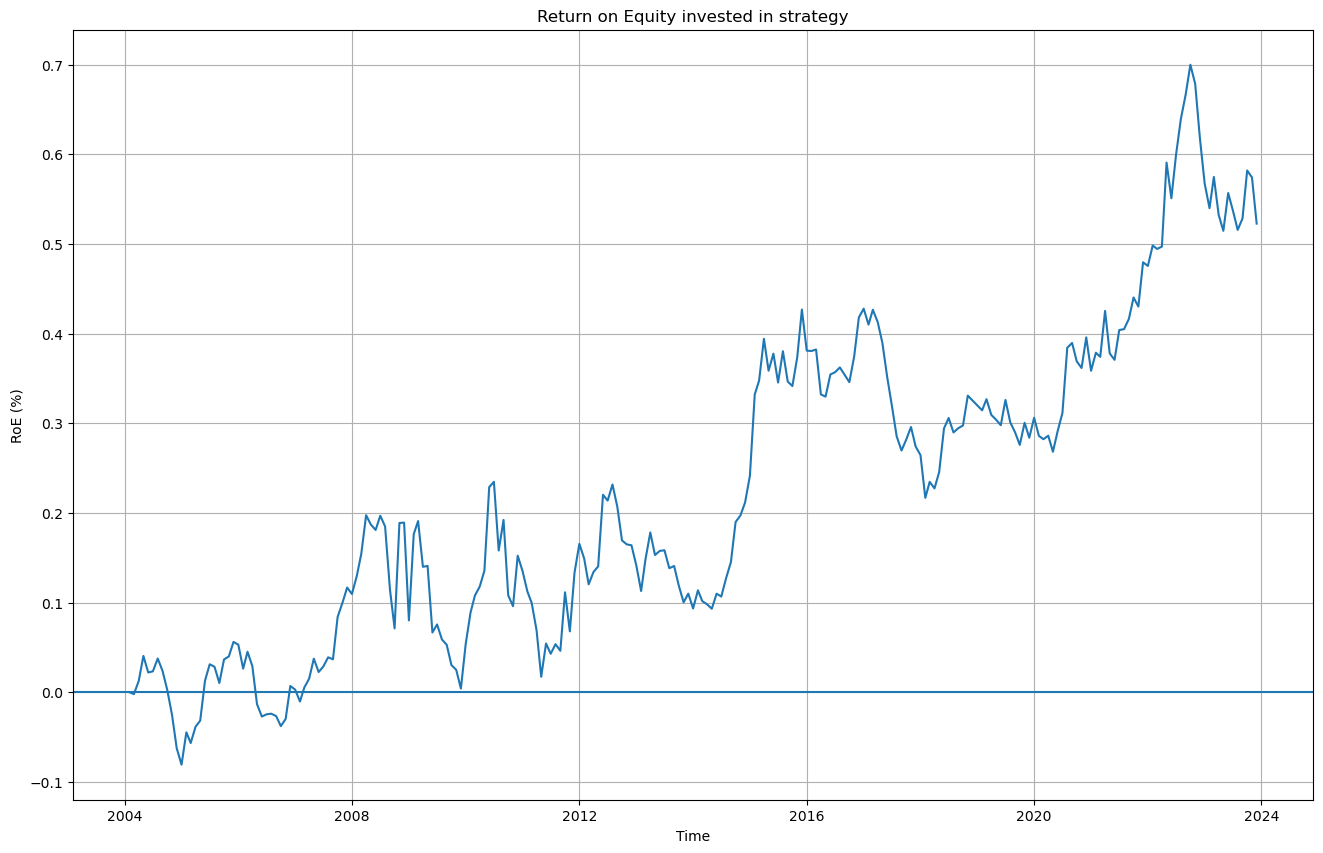

In [32]:
plt.figure(figsize = (16,10))
plt.plot(price_data.index,"Simple Strategy Returns" ,data=price_data)
plt.axhline(y = 0)
plt.title("Return on Equity invested in strategy")
plt.xlabel("Time")
plt.ylabel("RoE (%)")
plt.grid()
plt.plot()

In [34]:
start_value = price_data["Log Strategy Returns"].iloc[2]
end_value = price_data["Log Strategy Returns"].iloc[-1]
time_period = len(price_data)

In [35]:
CCROR = (end_value/start_value)/(time_period/12)
print(CCROR)

change = end_value/start_value
AR = (np.sign(change)*(np.abs(change)**(12/time_period)-1))*100
print(AR)

-10.08747067080222
-30.38889775749254
